# This Script Explores Using Stochastic Gradient Descent For Multivariate Logistic Regression

### All data was pulled from this [youtube video](https://www.youtube.com/watch?v=nzNp05AyBM8&t=386s)

# Logistic Regression Recap

### Predictor Function:

* $\hat{y}(z) = \frac{1}{1+e^{-z}}$

    * Where $z = b + w_1x_1 + w_2x_2 + ... w_nx_n$

Because this data set has 7 input variables, our z term becomes:
* $z = b + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + + w_6x_6 + w_7x_7$

We can represent the repeated $w_nx_n$ term in z by a matrix multiplication:

* $z = b + W^TX$ (where W is a column vector of our weights and X is a column vector of our input variables)

### Cost Function:

Since we will be performing Stochastic Gradient Descent, Our Single Sample Cost Function is:

* $ Error =  -y_i \ln(\hat{y}_i) - (1-y_i) \ln(1-\hat{y}_i) $

The partial derivative of this cost function for each sample w.r.t each weight is:

* $\frac{\partial Error}{\partial w_n} = (\hat{y_i}-y_i)x_n$

The partial derivative of this cost function for each sample w.r.t the bias term is:

* $\frac{\partial Error}{\partial b} =  (\hat{y_i}-y_i)$

### Stochastic Gradient Descent

When performing SGD, we will compute the partial cost for all weights & the bias term after pulling each
sample from the training data. We update each parameter by:

* $parameter_{new} = parameter_{old} - LearningRate*\frac{\partial Error}{\partial parameter_{old}}$

Parameters are updated n number of times each epoch where n is the # of training samples

In [1]:
#making necessary imports & pulling data from csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x_df = pd.read_csv('train_X_titanic.csv')
y_df = pd.read_csv('train_Y_titanic.csv')

x_train_data = x_df.values[:,1:]
y_train_data = y_df.values[:,1:]

#combining the training data arrays into 1 np array
train_data = np.append(x_train_data, y_train_data, axis=1)

In [2]:
def predictor_func(bias,weight_vec,input_var_vec):
    """
    This function returns our logistic model prediction provided our bias term, and vectors for our weights & their associated input variables
    """
    z = bias + np.matmul(weight_vec.T,input_var_vec)
    return 1/(1+np.exp(-z))

In [3]:
def partial_error_wrt_weights(y_observation,bias,weight_vec,input_var_vec):
    """
    This function returns the partial error derivative w.r.t each weight in our weight vector
    """
    #pulling our y prediction on the passed input variable vector
    y_prediction = predictor_func(bias,weight_vec,input_var_vec)
    #returning an np array of the partial associated for each weight
    return np.array([(y_prediction - y_observation)*input_var for input_var in input_var_vec])

In [4]:
def partial_error_wrt_bias(y_observation,bias,weight_vec,input_var_vec):
    """
    This function returns the partial error derivative w.r.t to the bias term
    """
    return predictor_func(bias,weight_vec,input_var_vec) - y_observation

In [5]:
def update_params(y_observation,bias,weight_vec,input_var_vec,learn_rate):
    """
    This function updates our weight parameter and bias term
    """
    #updating weights
    weight_vec_new = weight_vec - learn_rate*partial_error_wrt_weights(y_observation,bias,weight_vec,input_var_vec)
    bias_new = bias - learn_rate*partial_error_wrt_bias(y_observation,bias,weight_vec,input_var_vec)
    return weight_vec_new,bias_new

In [6]:
def error_func(training_data,bias,weight_vec):
    """
    This function computes our average error over all samples in the training data
    sample[0:7] = the x input array
    sample[-1] = the y observation
    """
    return 1/train_data.shape[0]*sum([-data_sample[-1]*np.log(predictor_func(bias,weight_vec,data_sample[0:7])) -
                                (1-data_sample[-1])*np.log(1-predictor_func(bias,weight_vec,data_sample[0:7])) for data_sample in training_data])

In [7]:
#performing the SGD

#hard coding a learn_rate & epoch #
learning_rate = 0.0001
epochs = 3000

#randomly assigning weight/bias term values
weights = np.array([np.random.uniform(-1,1) for _ in range(x_train_data.shape[1])])
b = 1

#init logs of variables of interest

#weights
w1_log, w2_log, w3_log, w4_log, w5_log, w6_log, w7_log  = [0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs
#bias
b_log = [0]*epochs
#weight partials
partial_w1_log,partial_w2_log,partial_w3_log,partial_w4_log,partial_w5_log,partial_w6_log,partial_w7_log = [0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs,[0]*epochs
#bias partial
partial_b_log = [0]*epochs
#error log
error_log = [0]*epochs


for epoch in range(epochs):
    #randomly shuffling the training data
    np.random.shuffle(train_data)
    #iterating over each sample in training data and updating params
    for sample in train_data:
        #checking if this sample has nan values:
        if np.isnan(sample).any():
            continue
        #splitting our sample into the vector of x inputs and scalar y output
        x_data,y_datapoint = sample[0:7] , sample[-1]
        #finding partials for current train data sample
        weight_partials = partial_error_wrt_weights(y_datapoint,b,weights,x_data)
        bias_partial =  partial_error_wrt_bias(y_datapoint,b,weights,x_data)
        #logging partial values
        partial_w1_log[epoch] ,partial_w2_log[epoch] ,partial_w3_log[epoch],partial_w4_log[epoch],partial_w5_log[epoch],partial_w6_log[epoch],partial_w7_log[epoch]  = weight_partials
        partial_b_log[epoch] = bias_partial
        #updating our parameters
        weights,b = update_params(y_datapoint,b,weights,x_data,learning_rate)
        #logging updated parameter values
        w1_log[epoch], w2_log[epoch], w3_log[epoch], w4_log[epoch], w5_log[epoch], w6_log[epoch], w7_log[epoch] = weights
        b_log[epoch] = b
    #calculating & logging our overall Log Loss Error after each training epoch
    error_log[epoch] = error_func(train_data,b,weights)
    #printing cost every 500 epochs
    if epoch%500==0:
        print(f'The current log loss of the model is: {error_log[epoch]}')

The current log loss of the model is: 1.1687151848271415
The current log loss of the model is: 0.45812774790207816
The current log loss of the model is: 0.45944975624904505
The current log loss of the model is: 0.45677668302392854
The current log loss of the model is: 0.5094918007573033
The current log loss of the model is: 0.44900216963043554


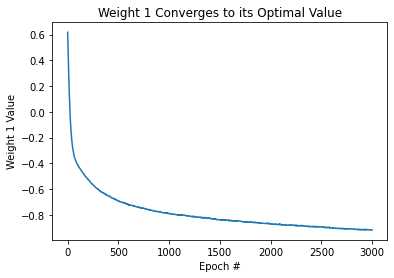

In [8]:
#plotting weight 1 value vs # of epochs
plt.plot(np.arange(epochs),w1_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 1 Value')
plt.title('Weight 1 Converges to its Optimal Value')
plt.show()

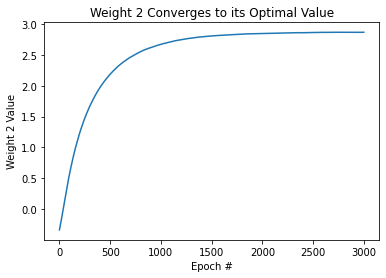

In [9]:
#plotting weight 2 value vs # of epochs

plt.plot(np.arange(epochs),w2_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 2 Value')
plt.title('Weight 2 Converges to its Optimal Value')
plt.show()

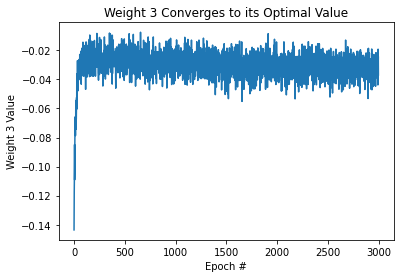

In [10]:
#plotting weight 3 value vs # of epochs

plt.plot(np.arange(epochs),w3_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 3 Value')
plt.title('Weight 3 Converges to its Optimal Value')
plt.show()

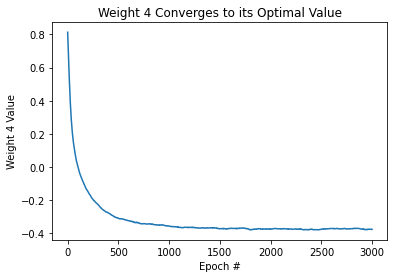

In [11]:
#plotting weight 4 value vs # of epochs

plt.plot(np.arange(epochs),w4_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 4 Value')
plt.title('Weight 4 Converges to its Optimal Value')
plt.show()

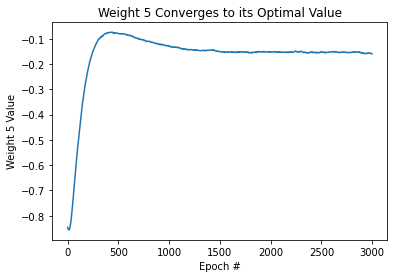

In [12]:
#plotting weight 5 value vs # of epochs

plt.plot(np.arange(epochs),w5_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 5 Value')
plt.title('Weight 5 Converges to its Optimal Value')
plt.show()


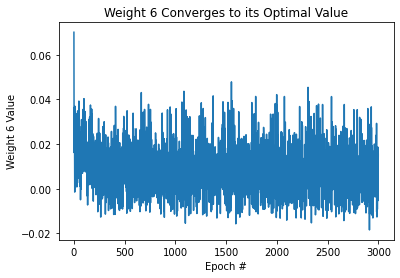

In [13]:
#plotting weight 6 value vs # of epochs

plt.plot(np.arange(epochs),w6_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 6 Value')
plt.title('Weight 6 Converges to its Optimal Value')
plt.show()

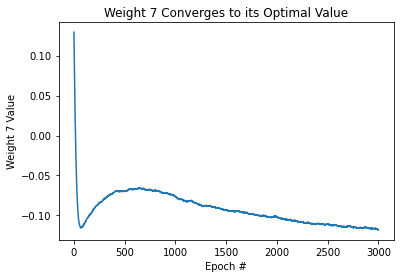

In [14]:
#plotting weight 7 value vs # of epochs

plt.plot(np.arange(epochs),w7_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 7 Value')
plt.title('Weight 7 Converges to its Optimal Value')
plt.show()


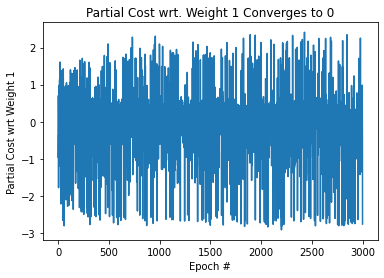

In [15]:
#plotting Partial Derivative of Cost wrt Weight 1 vs # of epochs

plt.plot(np.arange(epochs),partial_w1_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 1')
plt.title('Partial Cost wrt. Weight 1 Converges to 0')
plt.show()

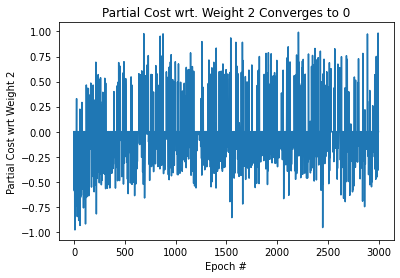

In [16]:
#plotting Partial Derivative of Cost wrt Weight 2 vs # of epochs

plt.plot(np.arange(epochs),partial_w2_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 2')
plt.title('Partial Cost wrt. Weight 2 Converges to 0')
plt.show()

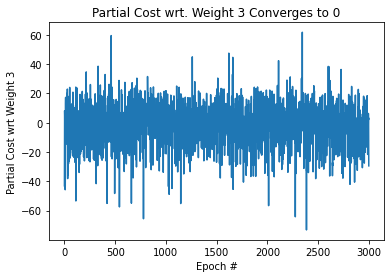

In [17]:
#plotting Partial Derivative of Cost wrt Weight 3 vs # of epochs

plt.plot(np.arange(epochs),partial_w3_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 3')
plt.title('Partial Cost wrt. Weight 3 Converges to 0')
plt.show()


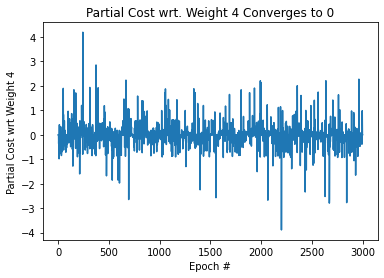

In [18]:
#plotting Partial Derivative of Cost wrt Weight 4 vs # of epochs

plt.plot(np.arange(epochs),partial_w4_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 4')
plt.title('Partial Cost wrt. Weight 4 Converges to 0')
plt.show()



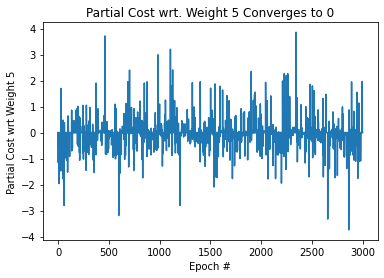

In [19]:
#plotting Partial Derivative of Cost wrt Weight 5 vs # of epochs

plt.plot(np.arange(epochs),partial_w5_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 5')
plt.title('Partial Cost wrt. Weight 5 Converges to 0')
plt.show()


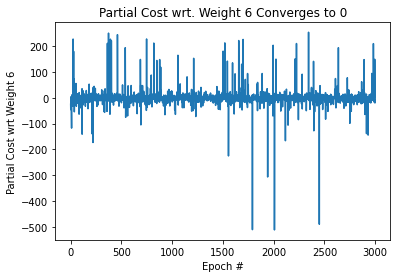

In [20]:
#plotting Partial Derivative of Cost wrt Weight 6 vs # of epochs

plt.plot(np.arange(epochs),partial_w6_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 6')
plt.title('Partial Cost wrt. Weight 6 Converges to 0')
plt.show()

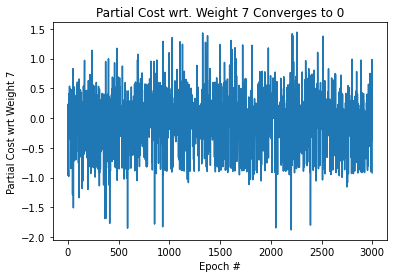

In [21]:
#plotting Partial Derivative of Cost wrt Weight 7 vs # of epochs

plt.plot(np.arange(epochs),partial_w7_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 7')
plt.title('Partial Cost wrt. Weight 7 Converges to 0')
plt.show()


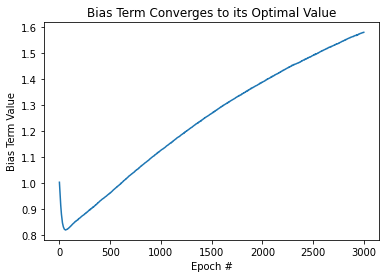

In [22]:
#plotting bias term value vs # of epochs

plt.plot(np.arange(epochs),b_log)
plt.xlabel('Epoch #')
plt.ylabel('Bias Term Value')
plt.title('Bias Term Converges to its Optimal Value')
plt.show()

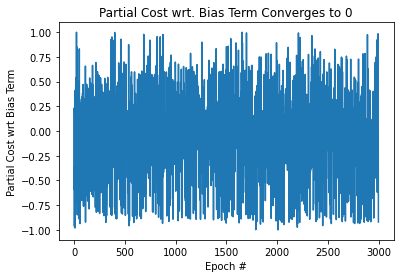

In [23]:
#plotting Partial Derivative of Cost wrt Bias Term vs # of epochs

plt.plot(np.arange(epochs),partial_b_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Bias Term')
plt.title('Partial Cost wrt. Bias Term Converges to 0')
plt.show()

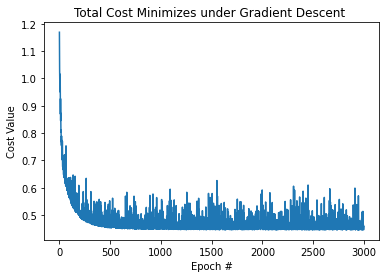

In [24]:
#plotting Cost vs # of epochs

plt.plot(np.arange(epochs),error_log)
plt.xlabel('Epoch #')
plt.ylabel('Cost Value')
plt.title('Total Cost Minimizes under Gradient Descent ')
plt.show()

In [25]:
#calculating model accuracy with optimal parameters
opt_weights = np.array([w1_log[-1],w2_log[-1],w3_log[-1],w4_log[-1],w5_log[-1],w6_log[-1],w7_log[-1]])
opt_b = b_log[-1]
#init counter of right predictions
right_predicts = 0

#Calculating our model accuracy against the training data
for row_index in range(train_data.shape[0]):
    observation_vec = train_data[row_index,:]
    x_input_vec = observation_vec[0:7]
    y_output = observation_vec[-1]
    prediction = predictor_func(opt_b,opt_weights,x_input_vec)
    if y_output == 1 and 0.5<=prediction<=1:
        right_predicts+=1
    elif y_output == 0 and 0<=prediction<0.5:
        right_predicts+=1
    else:
        pass
print(f'This Logistic Regression Model has an overall accuracy of {round(right_predicts/train_data.shape[0]*100,4)}%')
#printing optimized model params
print(f'Optimized Model Params: {opt_weights}')
print(f'Optimized Model Bias: {opt_b}')

This Logistic Regression Model has an overall accuracy of 79.0123%
Optimized Model Params: [-0.91665199  2.86667273 -0.03697697 -0.37587334 -0.15919179  0.01535852
 -0.1181433 ]
Optimized Model Bias: 1.5812132866077393


In [26]:
#testing our home-brewed model against a logistic regression model form SKL
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=5000)
logisticRegr.fit(x_train_data, y_train_data)
predictions = logisticRegr.predict(x_train_data)
score = logisticRegr.score(x_train_data, y_train_data)
print(f'The accuracy of the SKL logistic regression model on the train titanic Dataset is {score*100}%')
print(f'Optimized Model Params: {logisticRegr.coef_}')
print(f'Optimized Model Bias: {logisticRegr.intercept_}')

The accuracy of the SKL logistic regression model on the train titanic Dataset is 79.46127946127946%
Optimized Model Params: [[-1.01400182  2.66516934 -0.03452317 -0.32853749 -0.10041339  0.00275995
  -0.12936874]]
Optimized Model Bias: [2.02674095]


/opt/anaconda3/envs/VAIL_AI_CODE/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [27]:
#testing final accuracy of model against test dataset

#applying imputer data cleansing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

#pulling data
xt_df = pd.read_csv('test_X_titanic.csv')
yt_df = pd.read_csv('test_Y_titanic.csv')

#transforming the x input dataset which has Nans
x_test_data = xt_df.values[:,1:]
imp.fit(x_test_data)
x_test_data = imp.transform(x_test_data)

y_test_data = yt_df.values[:,1:]

#creating macro test_data np array
test_data = np.append(x_test_data, y_test_data, axis=1)

#init counter of right predictions
right_predicts = 0

#Calculating our model accuracy against the test data
for row_index in range(test_data.shape[0]):
    observation_vec = test_data[row_index,:]
    x_input_vec = observation_vec[0:7]
    y_output = observation_vec[-1]
    prediction = predictor_func(opt_b,opt_weights,x_input_vec)
    if y_output == 1 and 0.5<=prediction<=1:
        right_predicts+=1
    elif y_output == 0 and 0<=prediction<0.5:
        right_predicts+=1
    else:
        pass
print(f'The accuracy of the home-brew logistic regression model on the test titanic Dataset is {round(right_predicts/test_data.shape[0]*100,4)}%')

The accuracy of the home-brew logistic regression model on the test titanic Dataset is 91.866%


In [28]:
#testing final accuracy of SKL model against test dataset
predictions = logisticRegr.predict(x_test_data)
score = logisticRegr.score(x_test_data, y_test_data)
print(f'The accuracy of the SKL logistic regression model on the test titanic Dataset is {score*100}%')

The accuracy of the SKL logistic regression model on the test titanic Dataset is 95.93301435406698%


# Burning Questions Following This Exercise:
1) Is Stochastic Gradient Descent a good approach for this Logistic Regression Problem? Would Batch (or a different method) yield better accuracy on the test dataset?

2) Why did we see "jagged" behavior for some parameters? (their values & partials jumped around instead of settling out as our epoch number increased)

3) How/When do we know if parameters have been overfit?